In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the dataset into a pandas DataFrame
df = pd.read_csv('cleaned_dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['sentence'], df['category'], test_size=0.2, random_state=42)

# Convert the text into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train and evaluate 5 different models
models = [MultinomialNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
model_names = ['MultinomialNB', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier']

for i, model in enumerate(models):
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_names[i]} accuracy: {acc:.2f}")
    print(f"{model_names[i]} f1 score: {f1:.2f}")
    print(f"{model_names[i]} classification report:\n", classification_report(y_test, y_pred))
    print()

MultinomialNB accuracy: 0.95
MultinomialNB f1 score: 0.95
MultinomialNB classification report:
                                      precision    recall  f1-score   support

Contract Act And Sales Of Goods Act       0.84      0.78      0.81       383
                              Fraud       0.98      0.98      0.98      3636
                       criminal law       0.95      0.98      0.96      4841
                         family law       0.82      0.70      0.76       451
                       human rights       0.88      0.33      0.48        45
                  sexuall harasment       0.95      0.68      0.79        76

                           accuracy                           0.95      9432
                          macro avg       0.90      0.74      0.80      9432
                       weighted avg       0.95      0.95      0.95      9432


SVC accuracy: 0.96
SVC f1 score: 0.96
SVC classification report:
                                      precision    recall  f1-sco

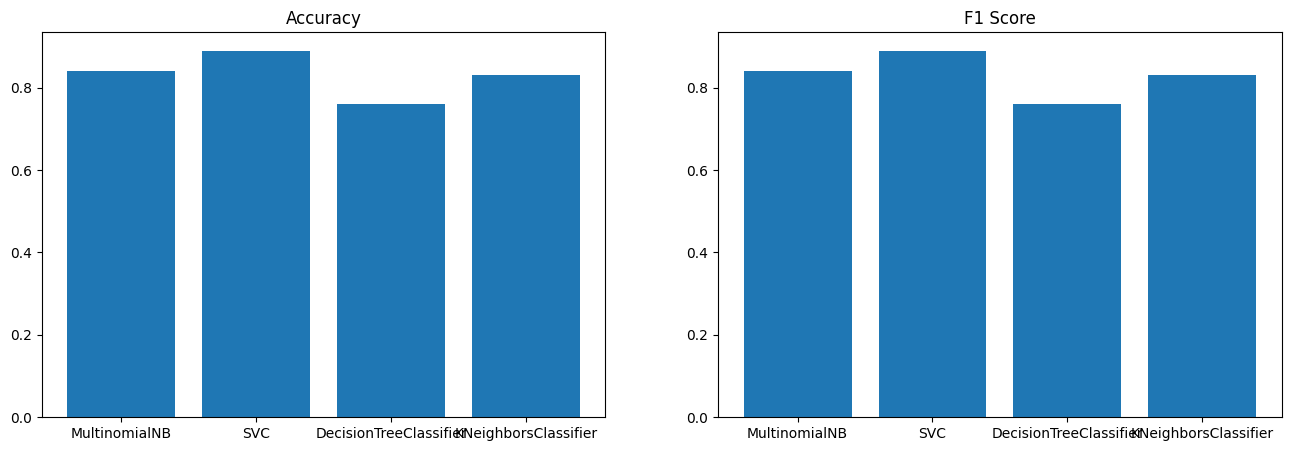

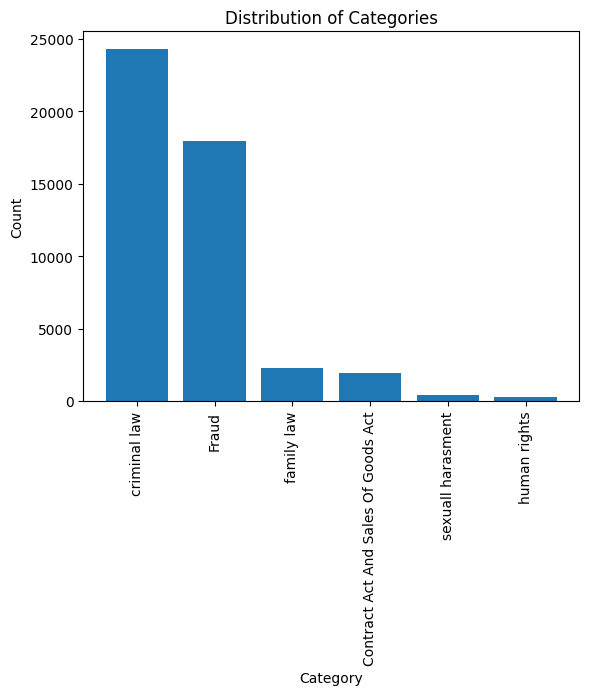

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the accuracy and F1 score for each model
accuracies = [0.84, 0.89, 0.76, 0.83]
f1_scores = [0.84, 0.89, 0.76, 0.83]

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].bar(model_names, accuracies)
ax[0].set_title("Accuracy")
ax[1].bar(model_names, f1_scores)
ax[1].set_title("F1 Score")
plt.show()

# Plot the distribution of the categories in the dataset
category_counts = df['category'].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sentence = "your sentence here"
sentence = vectorizer.transform([sentence])
prediction = clf.predict(sentence)
print('Predicted Category:', prediction[0])

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = df['sentence']
y = df['category']

# Encode the labels using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the sentences into numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Balance the training data using RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto')
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_vec, y_train)

# Balance the training data using SMOTE
smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

# Train a RandomForestClassifier on the resampled data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Predict the categories on the testing data
y_pred = clf.predict(X_test_vec)

# Calculate the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Function to predict the category of a sentence
def predict_category(sentence):
    sentence_vec = vectorizer.transform([sentence])
    category = clf.predict(sentence_vec)
    return le.inverse_transform(category)[0]

# Test the predict_category function
sentence = "This is a sample sentence for testing."
predicted_category = predict_category(sentence)
print("Predicted Category:", predicted_category)

Accuracy: 0.9086089906700594
Confusion Matrix:
 [[ 318   30    2   30    2    1]
 [ 147 3351    5   67   44   22]
 [ 133   79 4427  185   12    5]
 [  19   15   27  390    0    0]
 [   1   16    0    4   24    0]
 [   3   10    1    2    0   60]]
Predicted Category: human rights


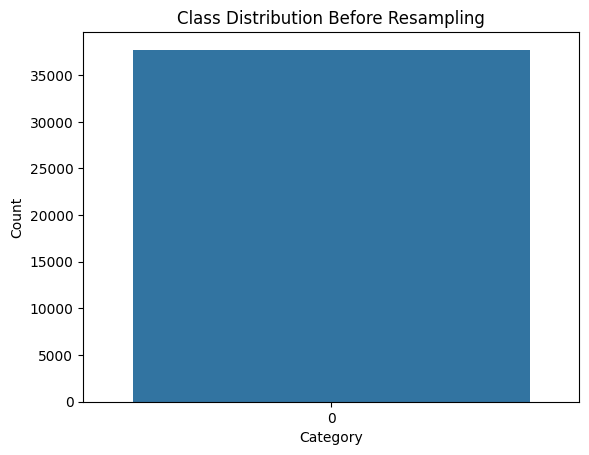

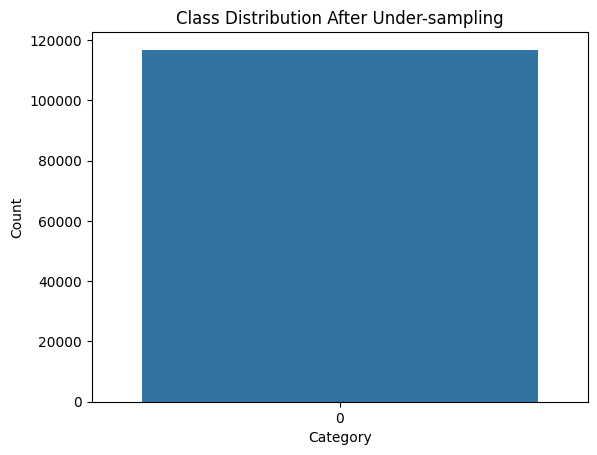

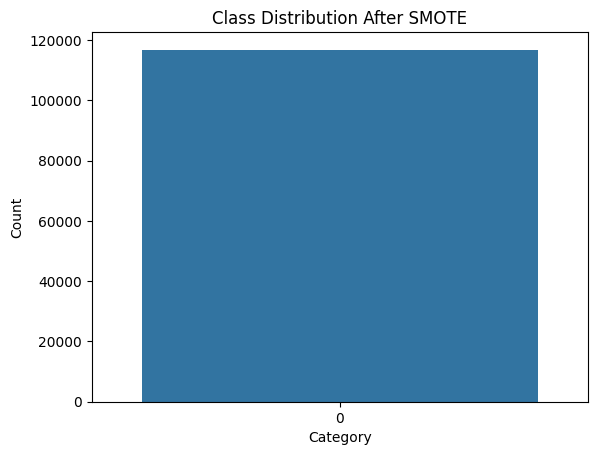

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution before resampling
sns.countplot(y_train)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Plot the class distribution after under-sampling
sns.countplot(y_train_resampled)
plt.title('Class Distribution After Under-sampling')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Plot the class distribution after SMOTE
sns.countplot(y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()